In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [113]:
def MSD(x, y):
  suma = 0
  MSD = [suma]
  for i in range(1,len(x)):
    suma += x[i]**2 + y[i]**2
    MSD.append(suma/i)
  return MSD

In [51]:
datos = np.genfromtxt('Mediciones/muestra 1 en 6 browniano.txt', delimiter=',')
print(np.shape(datos))

(431, 19)


In [61]:
# extraigo los datos a algo útil de usar

t = datos[:][0]


lista_pos=[]

for i in range(1, len(datos[0]), 2):
    xy = []
    for j in datos:
        if np.isnan(j[i]) == False: 
            xy.append([j[i], j[i+1]])
    xy = np.array(xy)
    lista_pos.append(xy)

lista_bien  = []
for part in lista_pos:
    np.stack(part)
    lista_bien.append(part.T)

In [121]:
# para entender el indexeado
print(f'lista_pos: {type(lista_pos)}, {len(lista_pos)}\npart: {type(lista_pos[0])}, {len(lista_pos[0])}\ncoord: {type(lista_pos[0][0])}, {len(lista_pos[0][0])}')
print(f'shape part lista_pos:{np.shape(lista_pos[0])}')

print(f'lista_bien: {type(lista_bien)}, {len(lista_bien)}\npart: {type(lista_bien[0])}, {len(lista_bien[0])}\ncoord: {type(lista_bien[0][0])}, {len(lista_bien[0][0])}')
print(f'shape part lista_bien:{np.shape(lista_bien[0])}')

# hay que sí o sí trasponer part

lista_pos: <class 'list'>, 9
part: <class 'numpy.ndarray'>, 429
coord: <class 'numpy.ndarray'>, 2
shape part lista_pos:(429, 2)
lista_bien: <class 'list'>, 9
part: <class 'numpy.ndarray'>, 2
coord: <class 'numpy.ndarray'>, 429
shape part lista_bien:(2, 429)


429


ValueError: x and y must have same first dimension, but have shapes (429,) and (428,)

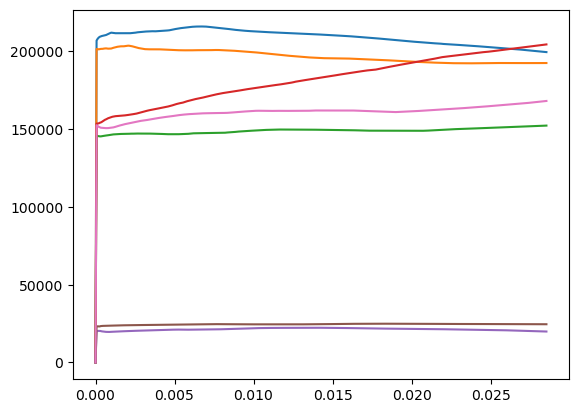

In [125]:
# MSD
fig, ax = plt.subplots()

lista_MSD = []
for n, part in enumerate(lista_bien):
    msd = MSD(part[0], part[1])
    lista_MSD.append(msd)

print(len(lista_MSD[0]))
for dev in lista_MSD:
    ax.plot(t, dev)
ax.set_xlabel('Tiempo')
ax.set_ylabel('MSD')
    

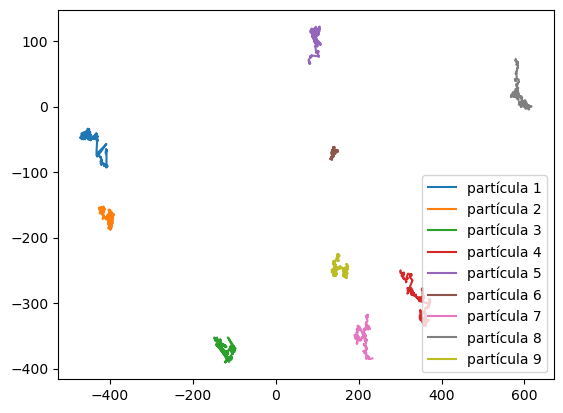

In [106]:
fig, ax = plt.subplots()
for n, part in enumerate(lista_bien):
    x = part[0]
    y = part[1]
    ax.plot(x, y, label=f'partícula {n+1}')
ax.legend()